In [1]:
# Import required packages
import torch
import numpy as np
import normflows as nf

from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
target = nf.distributions.TwoModes(2, 0.1)

/home/alveyjbg/mambaforge/envs/swyft-dev/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


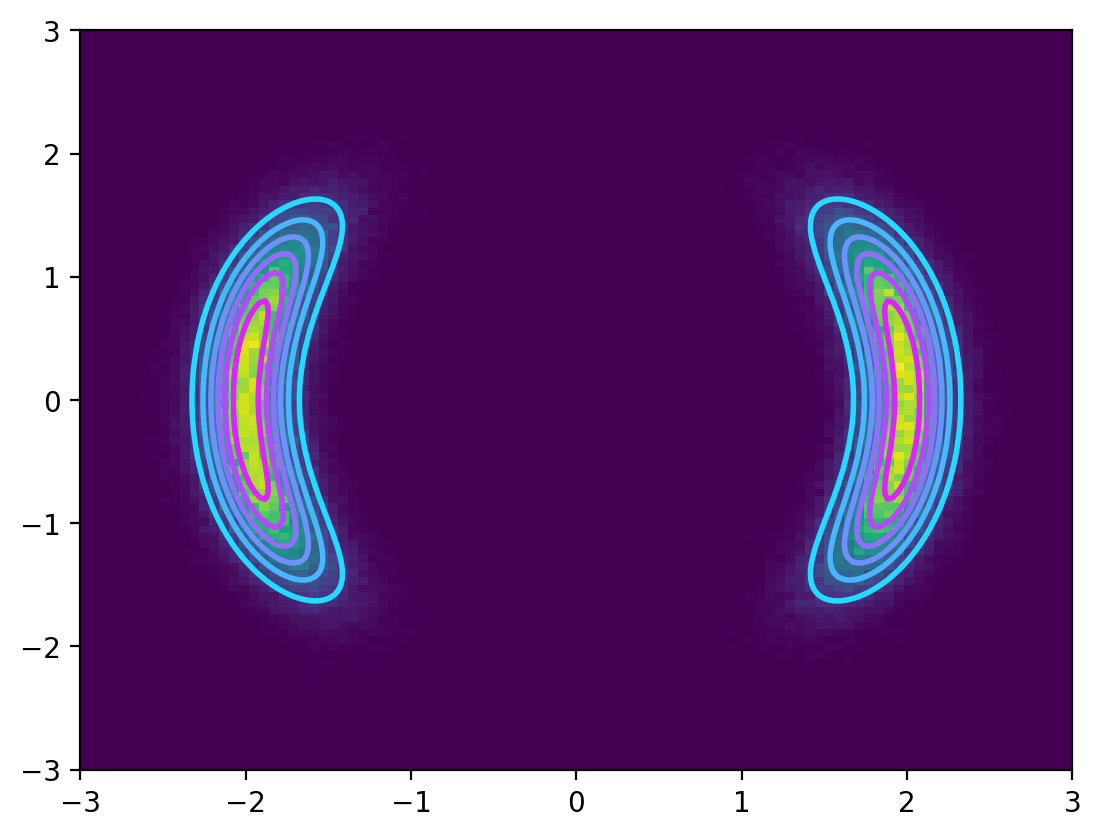

In [3]:
samples = target.sample(num_samples=2**18)
z = samples.to('cpu').data.numpy()
grid_size = 200
xx, yy = torch.meshgrid(torch.linspace(-3, 3, grid_size), torch.linspace(-3, 3, grid_size))
zz = torch.cat([xx.unsqueeze(2), yy.unsqueeze(2)], 2).view(-1, 2)
zz = zz.double().to("cpu")
log_prob = target.log_prob(zz).to('cpu').view(*xx.shape)
prob_target = torch.exp(log_prob)
plt.contour(xx, yy, prob_target.data.numpy(), cmap=plt.get_cmap('cool'), linewidths=2)
plt.hist2d(z[:, 0], z[:, 1], bins=(100, 100), range=[[-3, 3], [-3, 3]]);

In [6]:
samples = target.sample(num_samples=2**9)
z = samples.to('cpu').data.numpy()

In [7]:
np.save("data/target4", z)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-2.39283156, -2.34353105, -2.29423054, -2.24493003, -2.19562952,
        -2.14632901, -2.0970285 , -2.04772799, -1.99842748, -1.94912697,
        -1.89982646, -1.85052594, -1.80122543, -1.75192492, -1.70262441,
        -1.6533239 , -1.60402339, -1.55472288, -1.50542237, -1.45612186,
        -1.40682135, -1.35752084, -1.30822032, -1.25891981, -1.2096193 ,
        -1.16031879, -1.11101828, -1.06171777, -1.01241726, -0.96311675,
        -0.91381624, -0.86451573, -0.81521522, -0.7659147 , -0.71661419,
        -0.66731368, -0.61801317, -0.56871266, -0.51941215, -0.47011164,
        -0.42081113, -0.37151062, -0.32221011, -0.2729096 , -0.22360909,
        -0.17430857, -0.12500806, -0.07570755, -0.02640704,  0.02289347,
         0.07219398, 

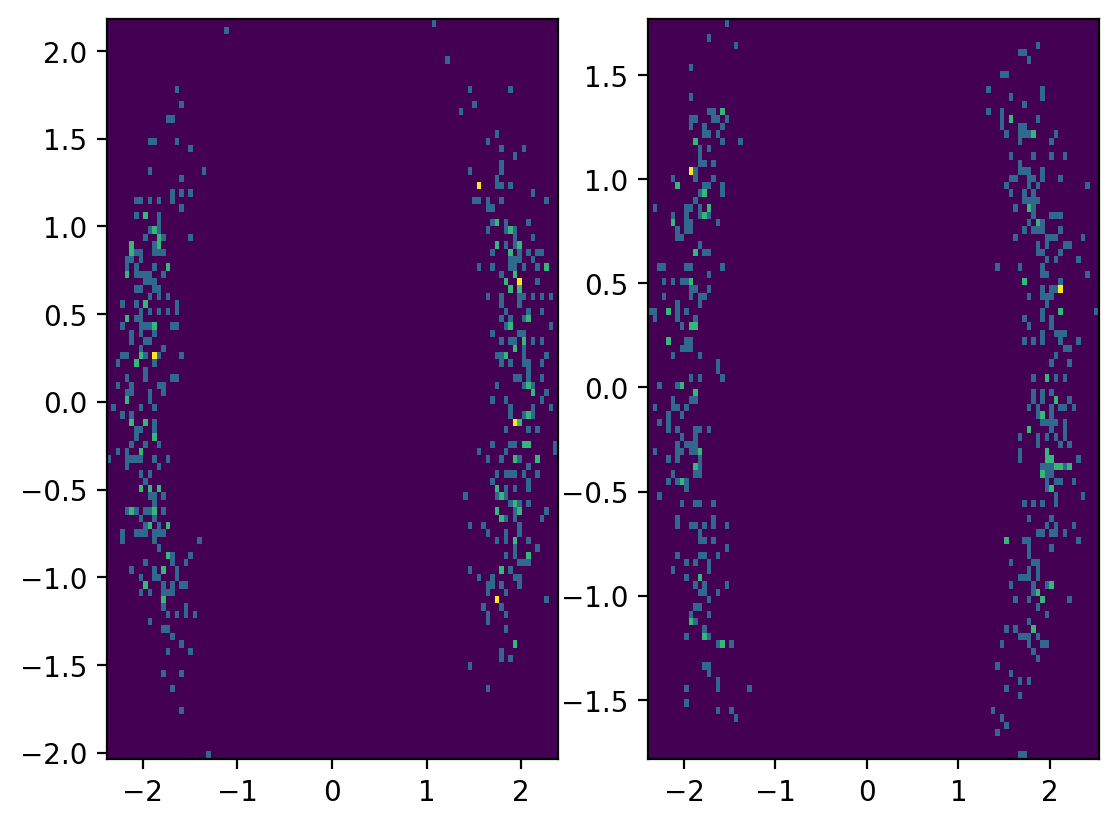

In [11]:
ax = plt.subplot(1, 2, 1)
plt.hist2d(np.load("data/target3.npy")[:, 0], np.load("data/target3.npy")[:, 1], bins=(100, 100))
ax = plt.subplot(1, 2, 2)
plt.hist2d(np.load("data/target4.npy")[:, 0], np.load("data/target4.npy")[:, 1], bins=(100, 100))